<a href="https://colab.research.google.com/github/zogojogo/Food-Detection-w-Machine-Learning/blob/main/Food_Detection_w_Food101_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Ambil data dari kaggle food101
2. Tambah Data foto makanan Indo
3. Pre-process
4. Image Annotation (buat faster R-CNN)
5. Buat modelnya
6. Train
7. Predict



##Setting Dataset

In [1]:
!git clone https://github.com/zogojogo/Food-Detection-w-Machine-Learning.git

Cloning into 'Food-Detection-w-Machine-Learning'...
remote: Enumerating objects: 25386, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 25386 (delta 3), reused 15 (delta 3), pack-reused 25371
Receiving objects: 100% (25386/25386), 685.39 MiB | 35.95 MiB/s, done.
Resolving deltas: 100% (12667/12667), done.
Checking out files: 100% (38845/38845), done.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from datetime import datetime

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
from tensorflow.keras.models import load_model

In [3]:
labels_index = {'ayam_geprek' : 0, 'bakso' : 1, 'cheesecake' : 2, 'chicken_curry' : 3, 'chicken_wings' : 4, 'chocolate_cake' : 5,
                'churros' : 6, 'cup_cakes' : 7, 'donuts' : 8, 'dumplings' : 9, 'fish_and_chips' : 10,
                'french_fries' : 11, 'french_toast' : 12, 'fried_rice' : 13, 'frozen_yogurt' : 14, 'garlic_bread' : 15, 'greek_salad' : 16,
                'grilled_cheese_sandwich' : 17, 'grilled_salmon' : 18, 'gyoza' : 19, 'hamburger' : 20, 'hot_dog' : 21, 'ice_cream' : 22, 'lasagna' : 23,
                'macaroni_and_cheese' : 24, 'nachos' : 25, 'omelette' : 26, 'onion_rings' : 27, 'pancakes' : 28, 'peking_duck' : 29, 'pho' : 30, 'pizza' : 31,
                'pork_chop' : 32, 'prime_rib' : 33, 'ramen' : 34, 'red_velvet_cake' : 35, 'rendang' : 36, 'risotto' : 37, 'sashimi' : 38, 'sate' : 39, 'soto' : 40,
                'spaghetti_bolognese' : 41, 'spaghetti_carbonara' : 42, 'spring_rolls' : 43, 'steak' : 44, 'sushi' : 45, 'tacos' : 46, 'takoyaki' : 47, 'tiramisu' : 48
                , 'waffles' : 49}

In [4]:
class_names = ['ayam_geprek', 'bakso', 'cheesecake', 'chicken_curry', 'chicken_wings', 'chocolate_cake',
                'churros', 'cup_cakes', 'donuts', 'dumplings', 'fish_and_chips',
                'french_fries', 'french_toast', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'greek_salad',
                'grilled_cheese_sandwich', 'grilled_salmon', 'gyoza', 'hamburger', 'hot_dog', 'ice_cream', 'lasagna',
                'macaroni_and_cheese', 'nachos', 'omelette', 'onion_rings', 'pancakes', 'peking_duck', 'pho', 'pizza',
                'pork_chop', 'prime_rib', 'ramen', 'red_velvet_cake', 'rendang', 'risotto', 'sashimi', 'sate', 'soto',
                'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'sushi', 'tacos', 'takoyaki', 'tiramisu'
                , 'waffles']

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        shear_range=0.3,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.25,
)
valid_datagen = ImageDataGenerator(
        rescale=1./255,
)

In [6]:
batch_size = 64

train_data = train_datagen.flow_from_directory(
    '/content/Food-Detection-w-Machine-Learning/Data Lama/train',
    batch_size=batch_size,
    target_size=(224, 224),
    shuffle=True,
    # class_mode = 'categorical'
)
valid_data = valid_datagen.flow_from_directory(
    '/content/Food-Detection-w-Machine-Learning/Data Lama/test',
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
    # class_mode = 'categorical'
)


Found 10000 images belonging to 50 classes.
Found 2500 images belonging to 50 classes.


In [7]:
feature_extractor_model = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"
# feature_extractor_model = "https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5"

In [8]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [9]:
# base = MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')
# base.trainable = True
model = Sequential()
model.add(feature_extractor_layer)
# model.add(Flatten())
# model.add(GlobalAveragePooling2D())
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(50, activation='softmax'))
opt = Adam(learning_rate=0.002)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              4226432   
_________________________________________________________________
dense (Dense)                (None, 50)                64050     
Total params: 4,290,482
Trainable params: 64,050
Non-trainable params: 4,226,432
_________________________________________________________________


In [11]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 1,verbose = 1)
early_stop = EarlyStopping(monitor = 'val_accuracy',patience = 5,verbose = 1,restore_best_weights = True)

In [12]:
history = model.fit(train_data, 
                    epochs=30,
                    validation_data = valid_data, 
                    verbose = 1,
                    callbacks=[early_stop])

Epoch 1/30
157/157 [==============================] - 205s 1s/step - loss: 1.6831 - accuracy: 0.5480 - val_loss: 1.0962 - val_accuracy: 0.6916
Epoch 2/30
157/157 [==============================] - 169s 1s/step - loss: 0.9501 - accuracy: 0.7297 - val_loss: 1.0151 - val_accuracy: 0.7092
Epoch 3/30
157/157 [==============================] - 167s 1s/step - loss: 0.7765 - accuracy: 0.7740 - val_loss: 0.9934 - val_accuracy: 0.7304
Epoch 4/30
157/157 [==============================] - 167s 1s/step - loss: 0.6568 - accuracy: 0.8063 - val_loss: 0.9883 - val_accuracy: 0.7192
Epoch 5/30
157/157 [==============================] - 166s 1s/step - loss: 0.5734 - accuracy: 0.8325 - val_loss: 0.9997 - val_accuracy: 0.7204
Epoch 6/30
157/157 [==============================] - 165s 1s/step - loss: 0.5140 - accuracy: 0.8513 - val_loss: 1.0272 - val_accuracy: 0.7204
Epoch 7/30
157/157 [==============================] - 163s 1s/step - loss: 0.4561 - accuracy: 0.8697 - val_loss: 1.0250 - val_accuracy: 0.7224

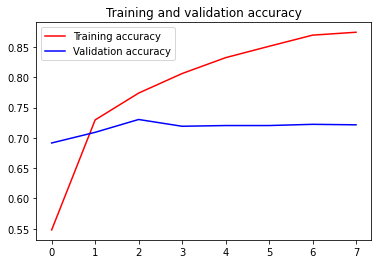

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [21]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  label = classes.argmax(axis=-1)
  print(fn)
  print(classes)
  print(label) 
  print('Hari ini makan {}'.format(class_names[label[0]]))

Saving cab1c5efd0a8a7a622687bd77491608d.jpg to cab1c5efd0a8a7a622687bd77491608d.jpg
Saving DAGING-RENDANG.jpg to DAGING-RENDANG.jpg
Saving 3305.jpg to 3305.jpg
Saving 1228695675.jpg to 1228695675.jpg
Saving 3292.jpg to 3292.jpg
Saving 1200px-Rendang_daging_sapi_asli_Padang.JPG.jpg to 1200px-Rendang_daging_sapi_asli_Padang.JPG.jpg
Saving images_daging_rendang-kalio-1200x813.jpg to images_daging_rendang-kalio-1200x813.jpg
Saving bG9jYWw6Ly8vcHVibGlzaGVycy84MTI2LzIwMjAwNzAyMTEzNS1tYWluLmNyb3BwZWRfMTU5MzY2NDUzMS5qcGc.jpg to bG9jYWw6Ly8vcHVibGlzaGVycy84MTI2LzIwMjAwNzAyMTEzNS1tYWluLmNyb3BwZWRfMTU5MzY2NDUzMS5qcGc.jpg
Saving resep-rendang.jpg to resep-rendang.jpg
Saving 46840-rendang-hitam-khas-urang-minang.jpg to 46840-rendang-hitam-khas-urang-minang.jpg
Saving cara-masak-rendang.jpg to cara-masak-rendang.jpg
cab1c5efd0a8a7a622687bd77491608d.jpg
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 

In [39]:
import time
saved_model_path = "/tmp/{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras {saved_model_path} ./